In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

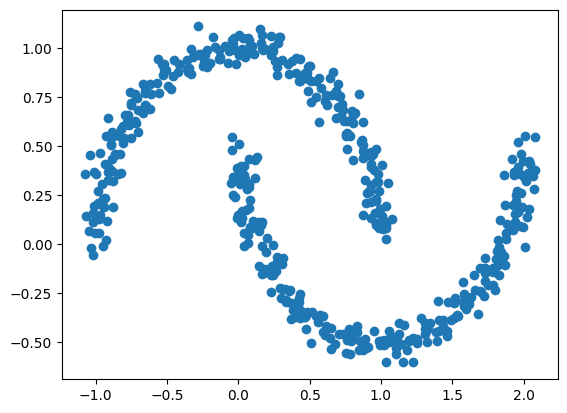

In [3]:
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

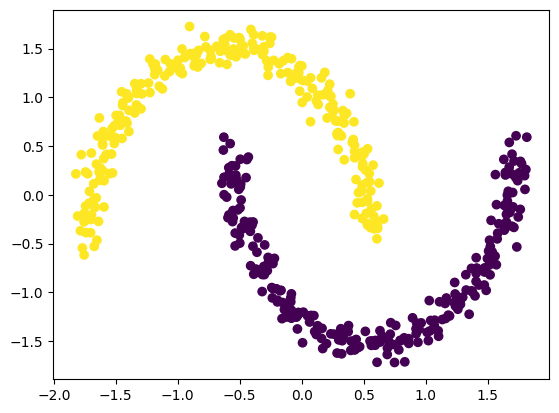

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')

In [8]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3893383378360491


In [12]:
sc = []
for eps in np.arange(0.1, 1.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_scaled)
    labels = dbscan.labels_
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        sc.append((eps, score))
    else:
        sc.append((eps, -1))
print(f"Eps vs Silhouette Score:{sc}")

Eps vs Silhouette Score:[(np.float64(0.1), 0.14656990282302268), (np.float64(0.2), 0.3893383378360491), (np.float64(0.30000000000000004), 0.3893383378360491), (np.float64(0.4), 0.3893383378360491), (np.float64(0.5), 0.3893383378360491), (np.float64(0.6), 0.3893383378360491), (np.float64(0.7000000000000001), -1), (np.float64(0.8), -1), (np.float64(0.9), -1)]
